<a href="https://colab.research.google.com/github/Aridel7/Study_2/blob/main/TSML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Временные ряды, общая теория**

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox

In [3]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [4]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

1. daily-total-female-births-in-cal

In [7]:
series_1 = pd.read_csv('/content/daily-total-female-births-in-cal.csv')['Count']
series_1.head()

0    35
1    32
2    30
3    31
4    44
Name: Count, dtype: int64

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


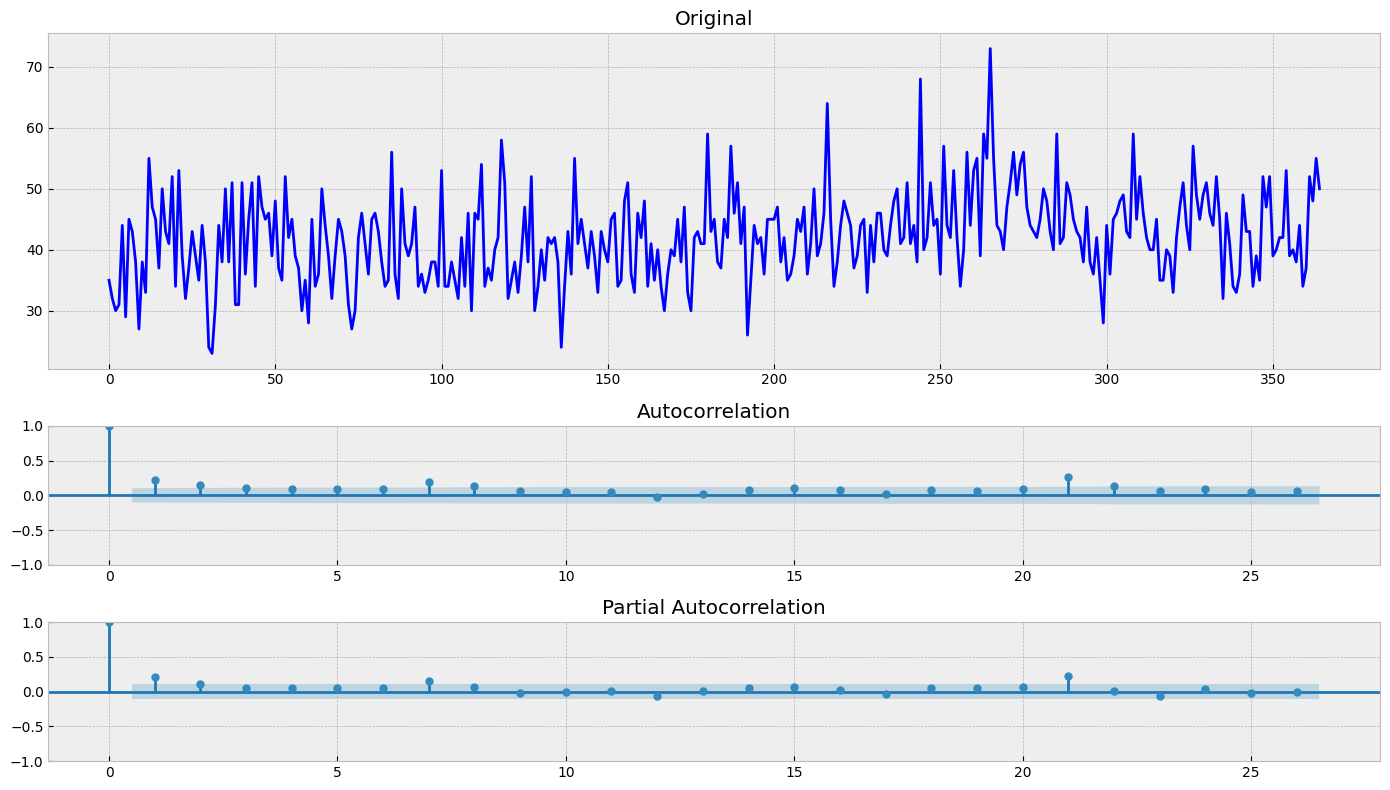

In [8]:
tsplot(series_1)

Test Statistic < Critical Value (1%) (-4.81 < -3.45) => the series is **stationary**

2. international-airline-passengers

In [17]:
series_2 = pd.read_csv('/content/international-airline-passengers.csv')['Count']
series_2.head()

0    112
1    118
2    132
3    129
4    121
Name: Count, dtype: int64

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


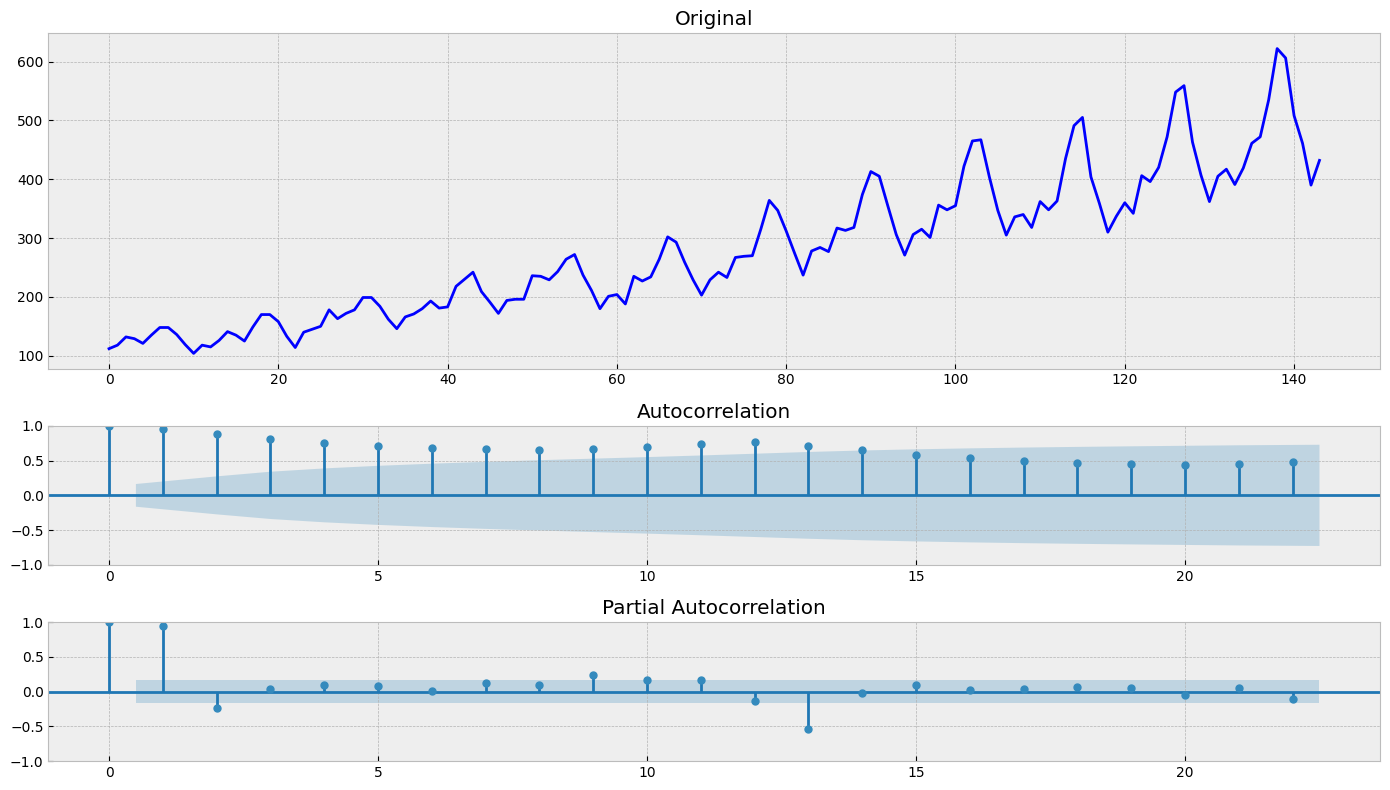

In [18]:
tsplot(series_2)

In [19]:
series_2 = boxcox(series_2, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


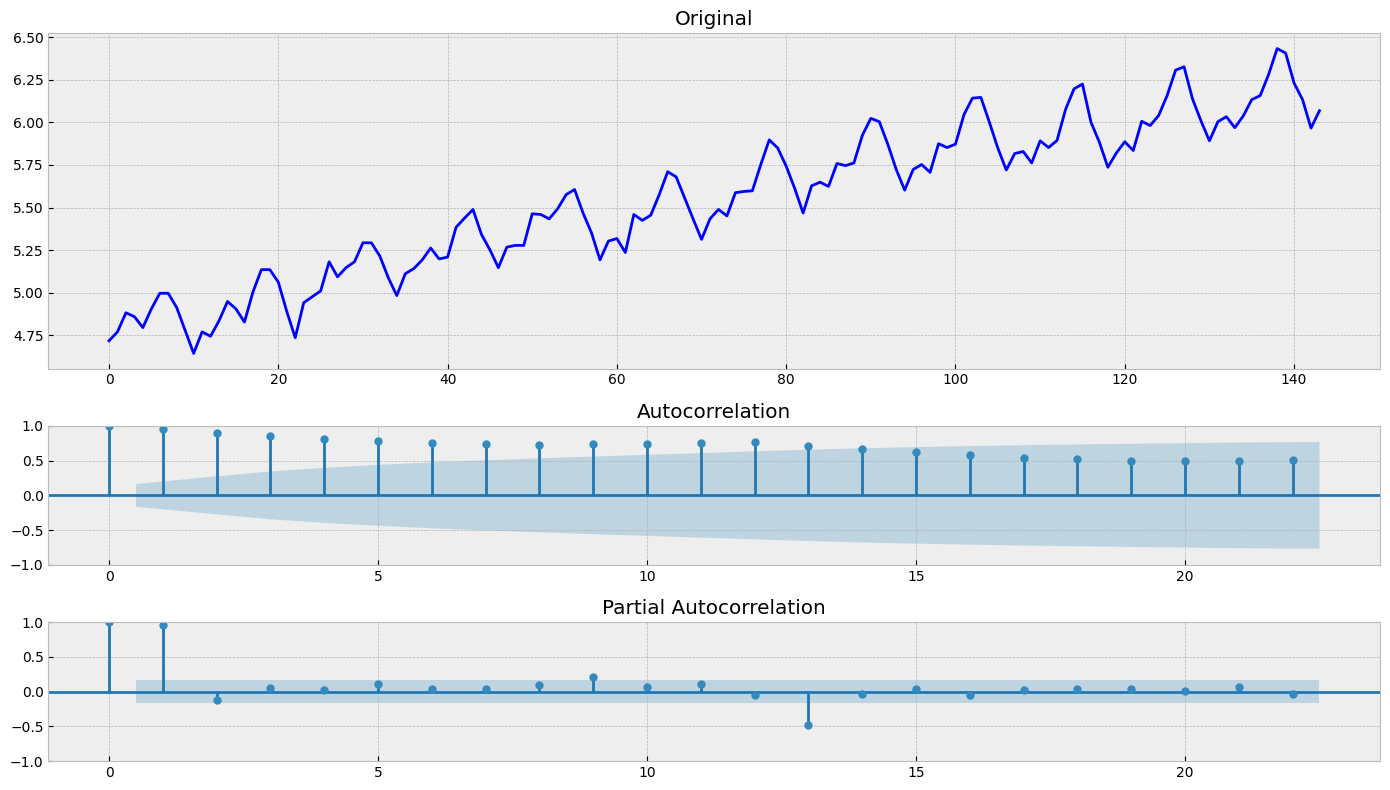

In [20]:
tsplot(series_2)

In [21]:
series_2 = series_2[1:] - series_2[:-1]

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


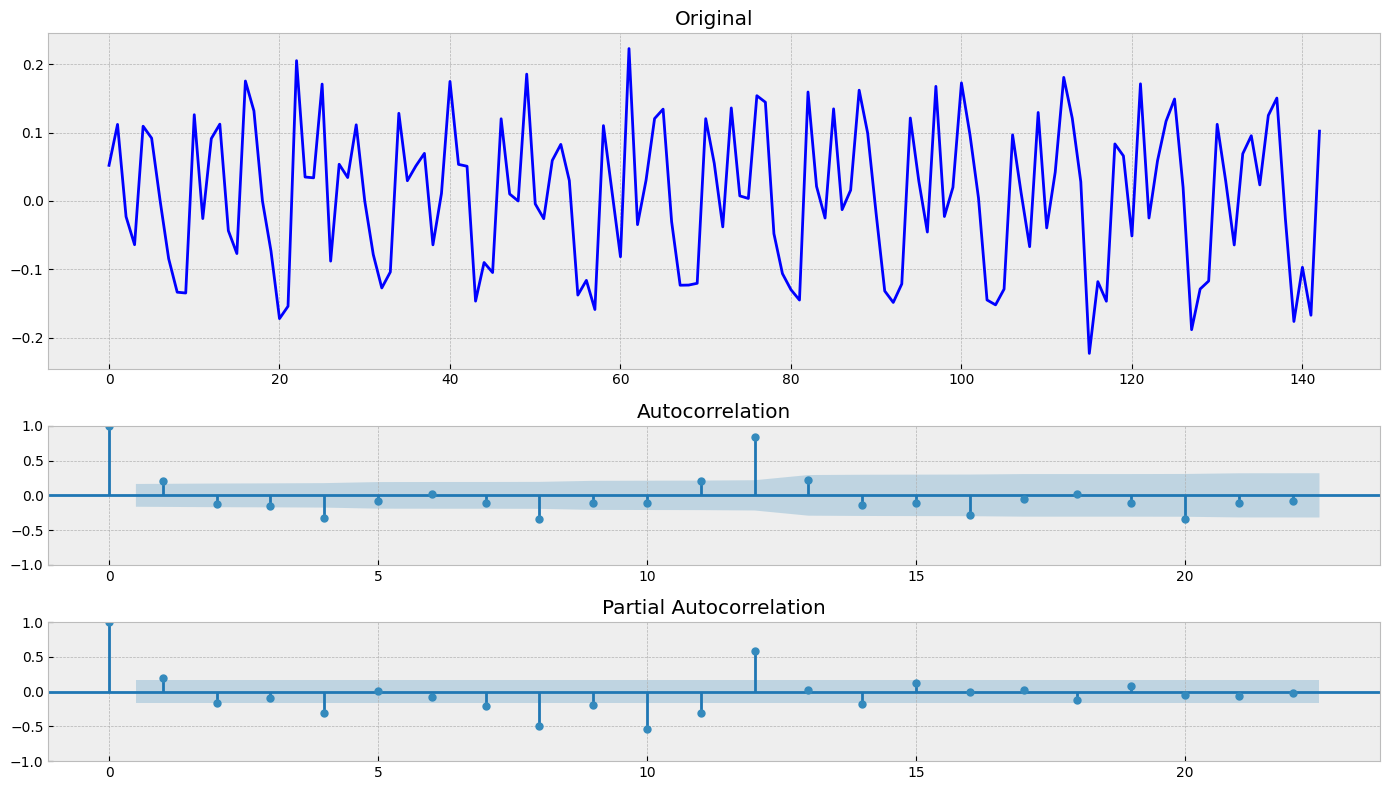

In [22]:
tsplot(series_2)

In [23]:
series_2 = series_2[12:] - series_2[:-12]

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


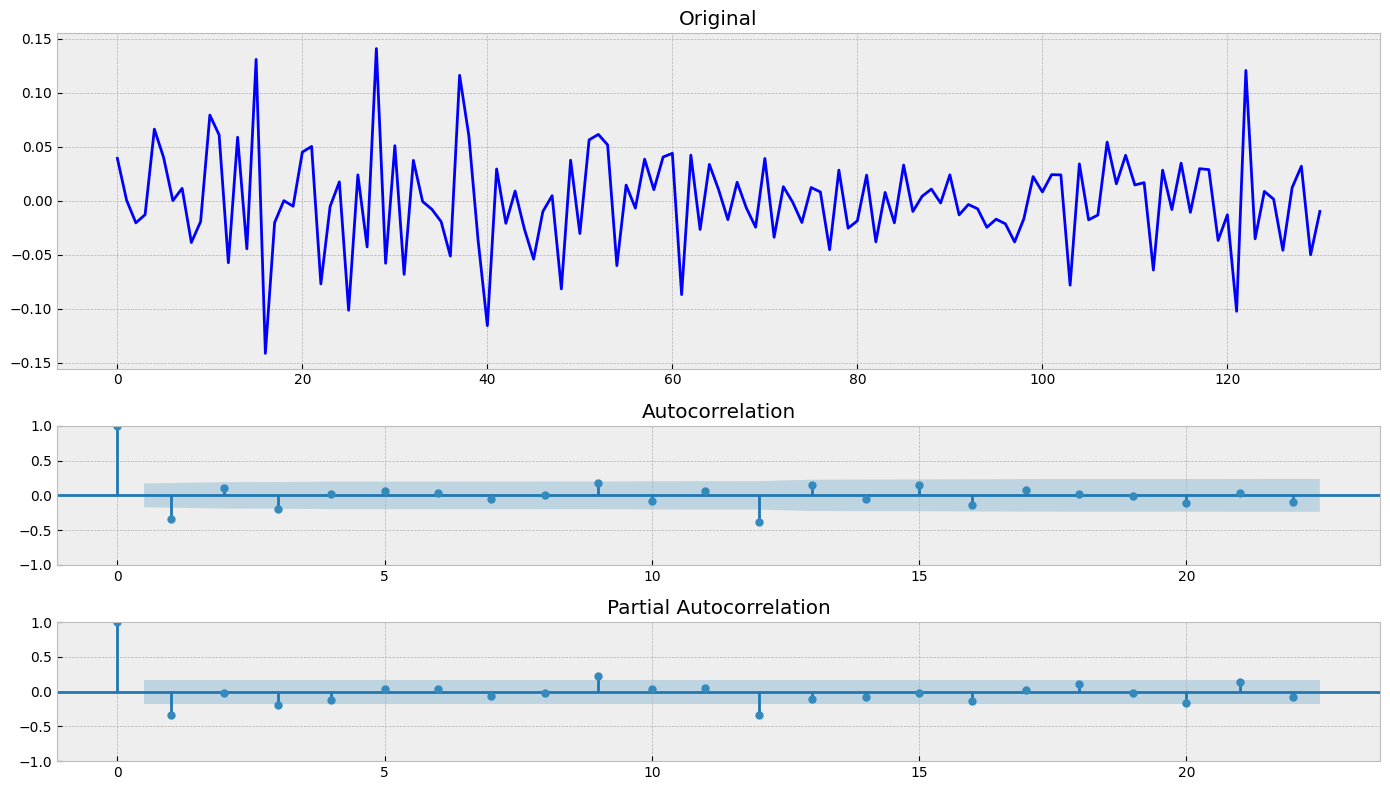

In [24]:
tsplot(series_2)

Test Statistic < Critical Value (1%) (-4.44 < -3.49) => the series is **stationary**

3. mean-monthly-air-temperature-deg

In [58]:
series_3 = pd.read_csv('/content/mean-monthly-air-temperature-deg.csv')['Deg']
series_3.head()

0    40.6
1    40.8
2    44.4
3    46.7
4    54.1
Name: Deg, dtype: float64

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


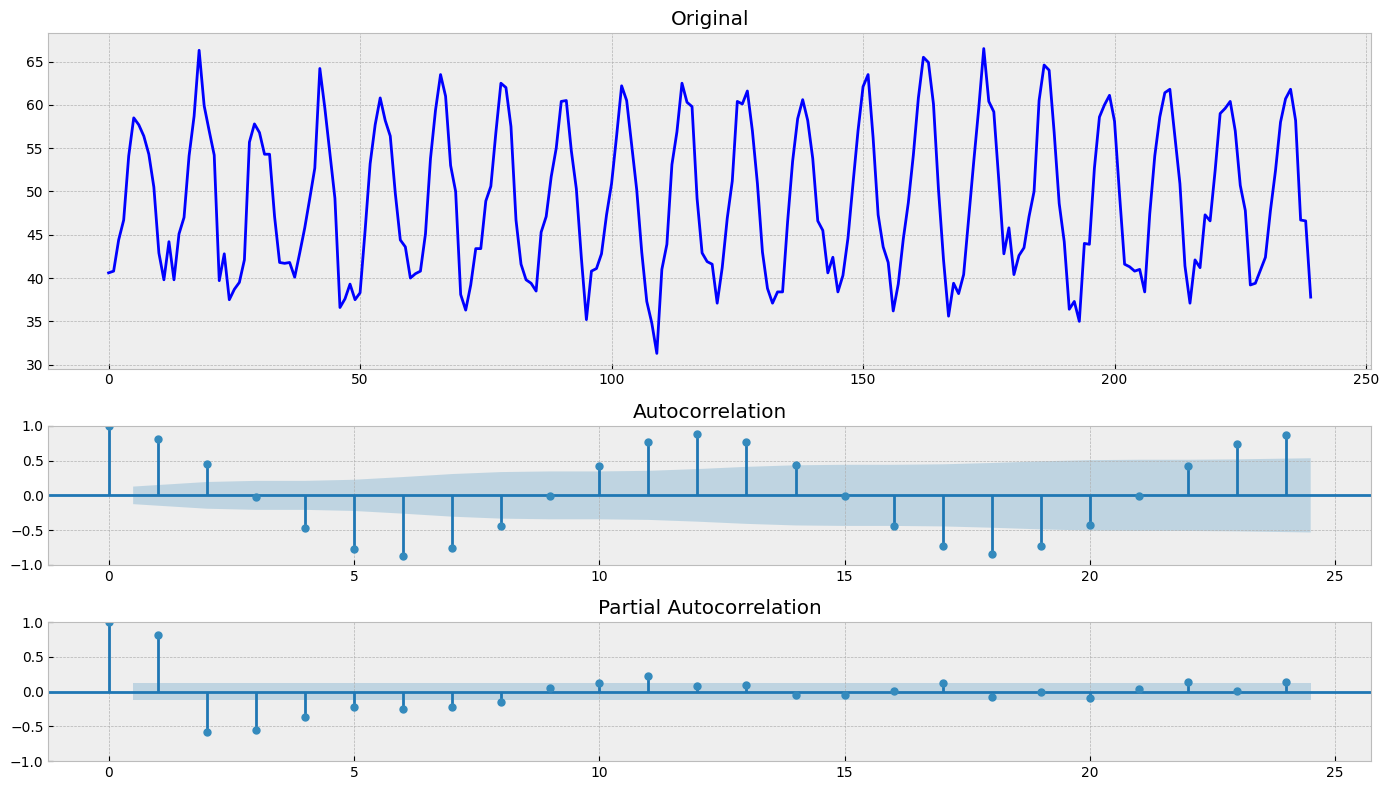

In [59]:
tsplot(series_3)

In [123]:
series_3 = series_3[12:].to_numpy() - series_3[:-12].to_numpy()

Results of Dickey-Fuller Test:
Test Statistic                -6.072501e+00
p-value                        1.141945e-07
#Lags Used                     1.200000e+01
Number of Observations Used    2.150000e+02
Critical Value (1%)           -3.461136e+00
Critical Value (5%)           -2.875079e+00
Critical Value (10%)          -2.573986e+00
dtype: float64


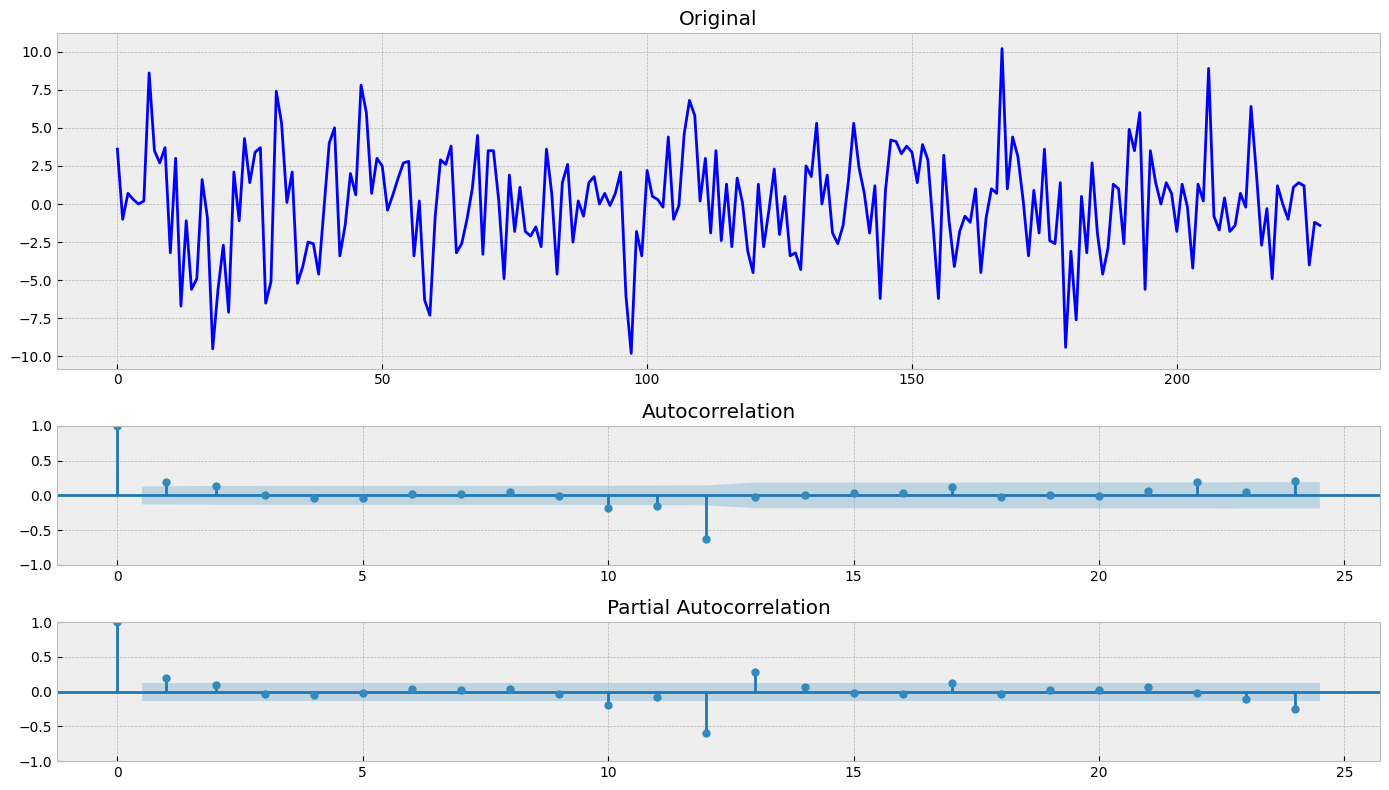

In [124]:
tsplot(series_3)

Test Statistic < Critical Value (1%) (-6.07 < -3.46) => the series is **stationary**

4. monthly-boston-armed-robberies-j

In [130]:
series_4 = pd.read_csv('/content/monthly-boston-armed-robberies-j.csv')['Count']
series_4.head()

0    41
1    39
2    50
3    40
4    43
Name: Count, dtype: int64

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


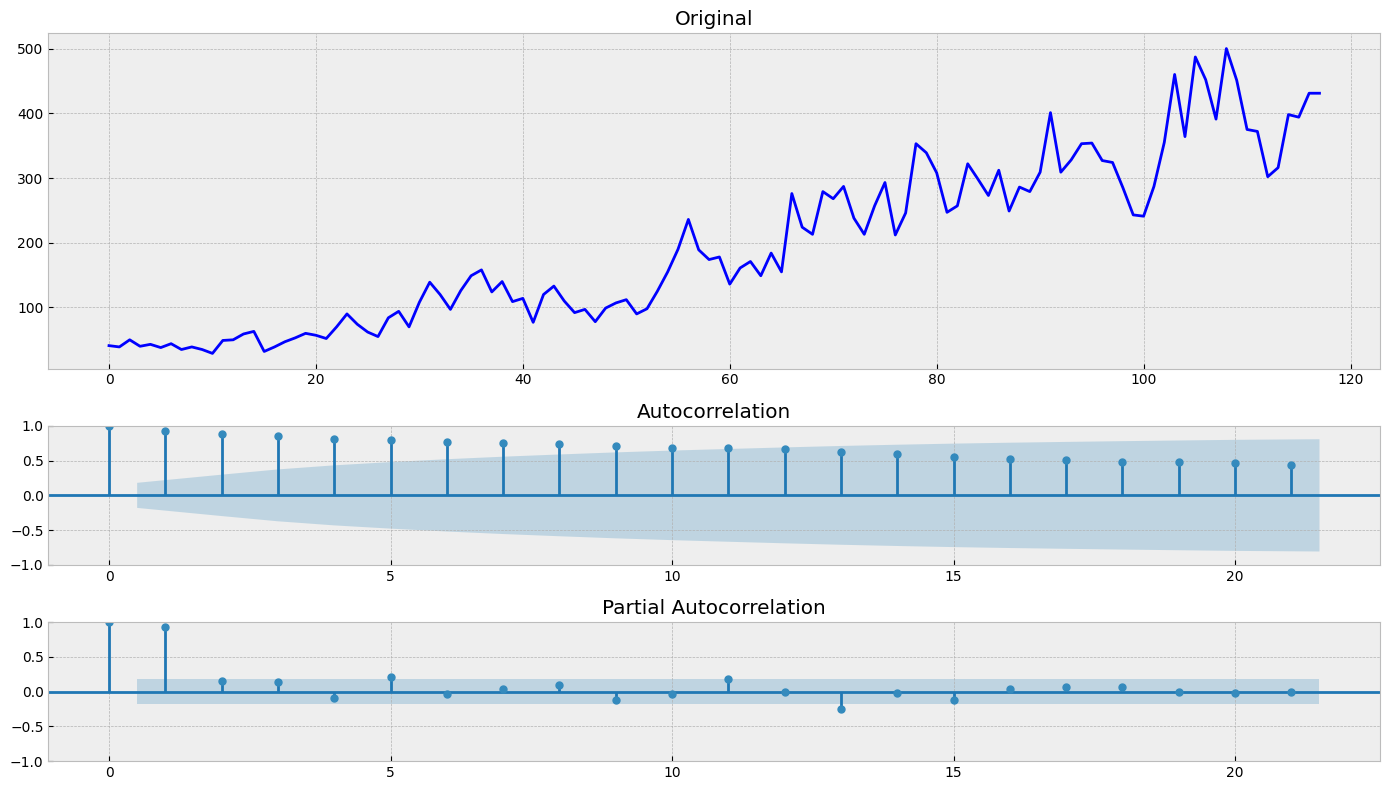

In [127]:
tsplot(series_4)

In [131]:
series_4 = series_4[1:].to_numpy() - series_4[:-1].to_numpy()

Results of Dickey-Fuller Test:
Test Statistic                -7.428564e+00
p-value                        6.450795e-11
#Lags Used                     1.000000e+01
Number of Observations Used    1.060000e+02
Critical Value (1%)           -3.493602e+00
Critical Value (5%)           -2.889217e+00
Critical Value (10%)          -2.581533e+00
dtype: float64


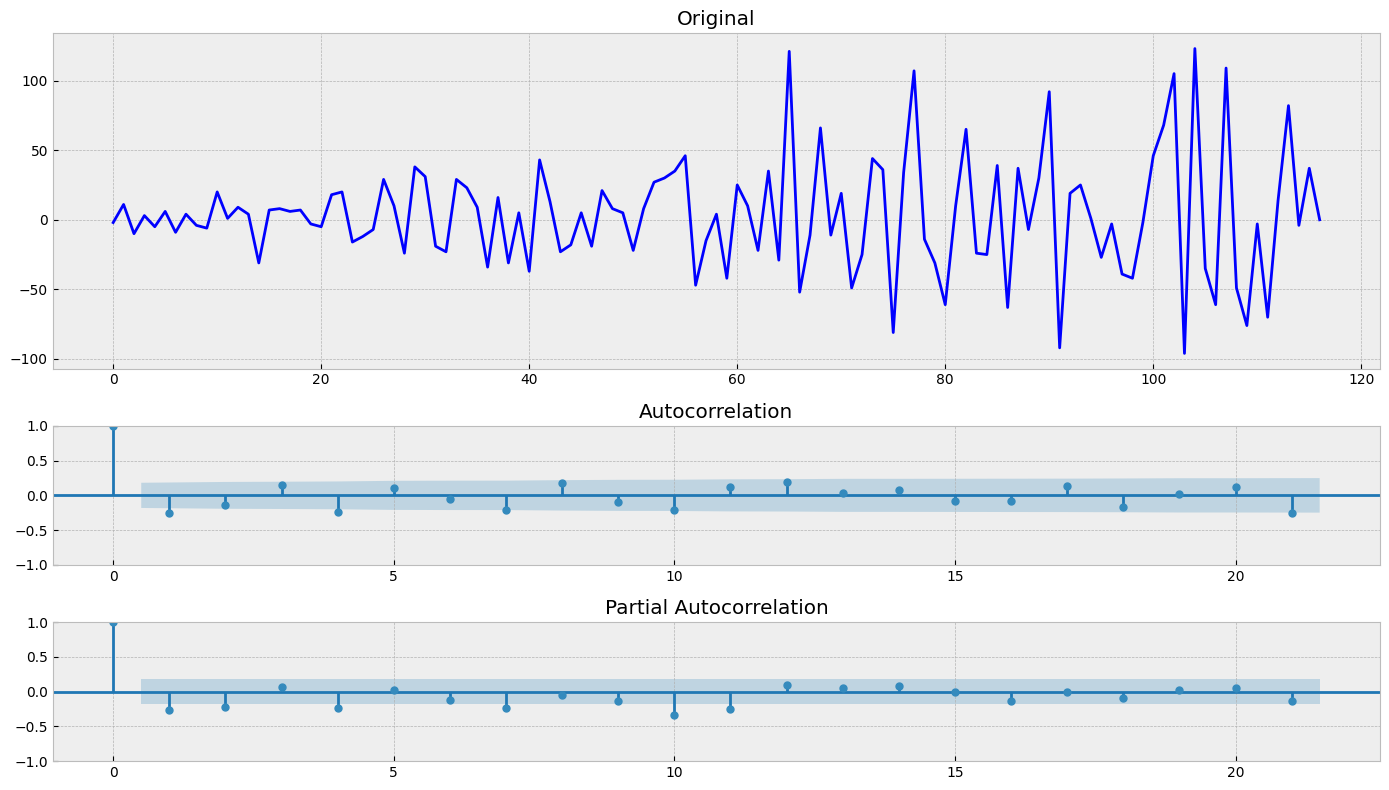

In [133]:
tsplot(series_4)

Test Statistic < Critical Value (1%) (-7.43 < -3.49) => the series is **stationary**

5. monthly-sales-of-company-x-jan-6

In [152]:
series_5 = pd.read_csv('/content/monthly-sales-of-company-x-jan-6.csv')['Count']
series_5.head()

0    154
1     96
2     73
3     49
4     36
Name: Count, dtype: int64

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


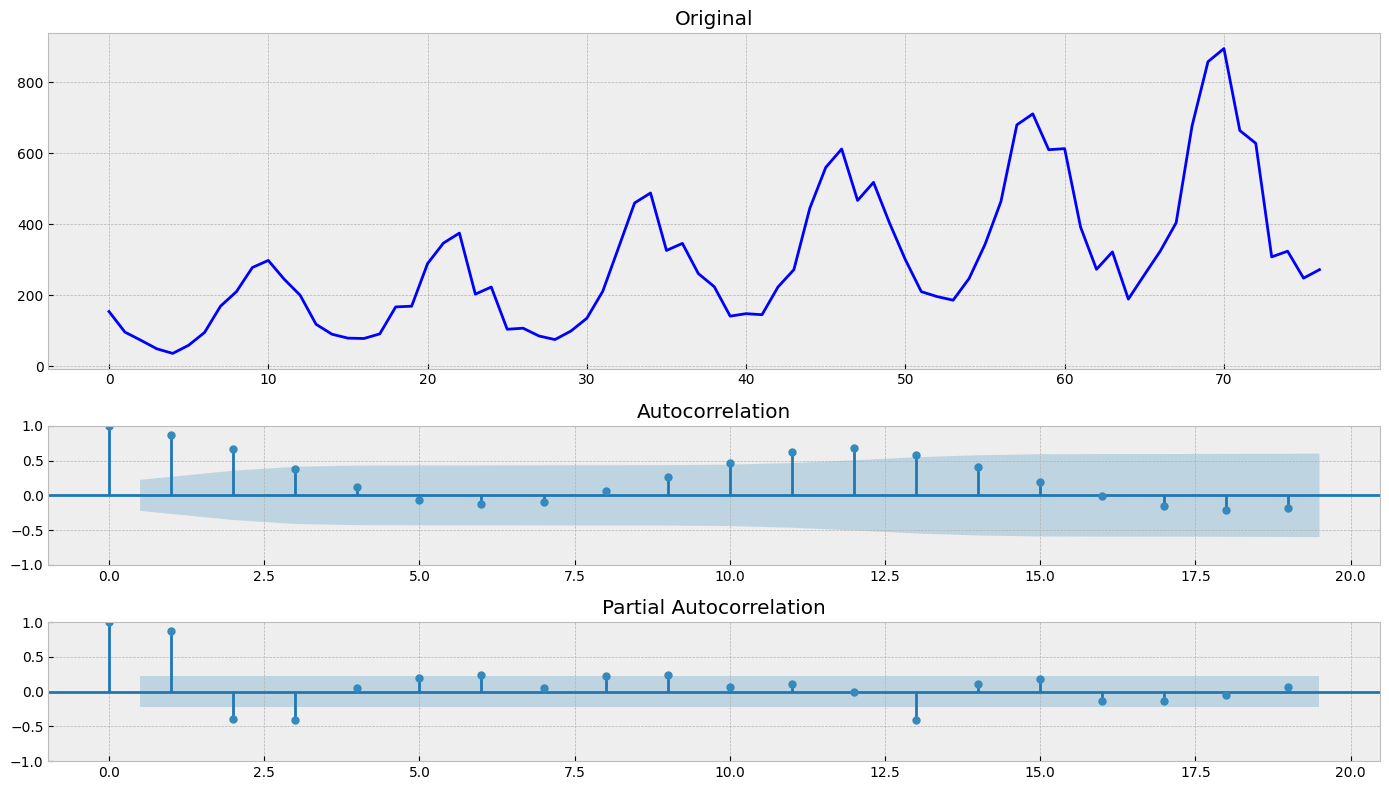

In [153]:
tsplot(series_5)

In [154]:
series_5 = boxcox(series_5, 0)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


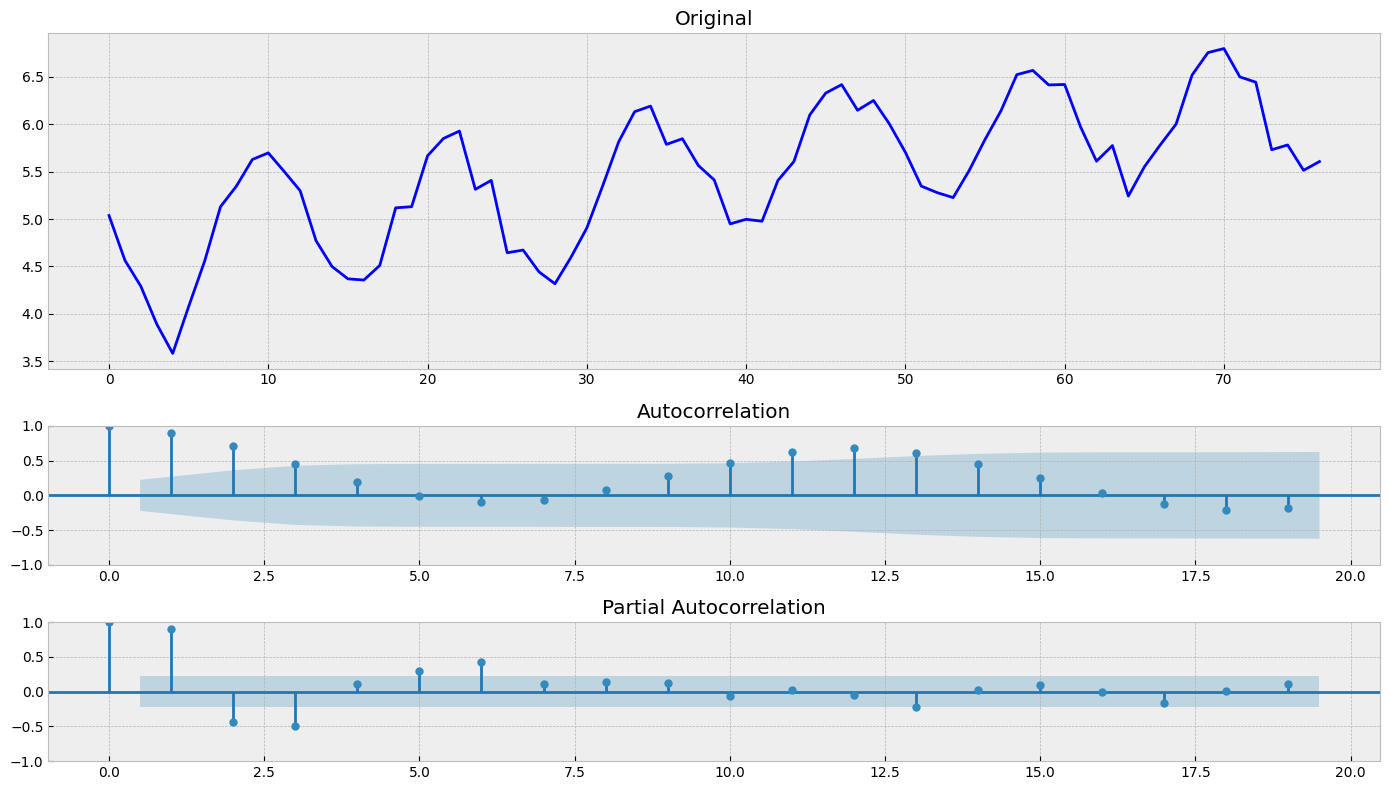

In [155]:
tsplot(series_5)

In [156]:
series_5 = series_5[1:] - series_5[:-1]

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


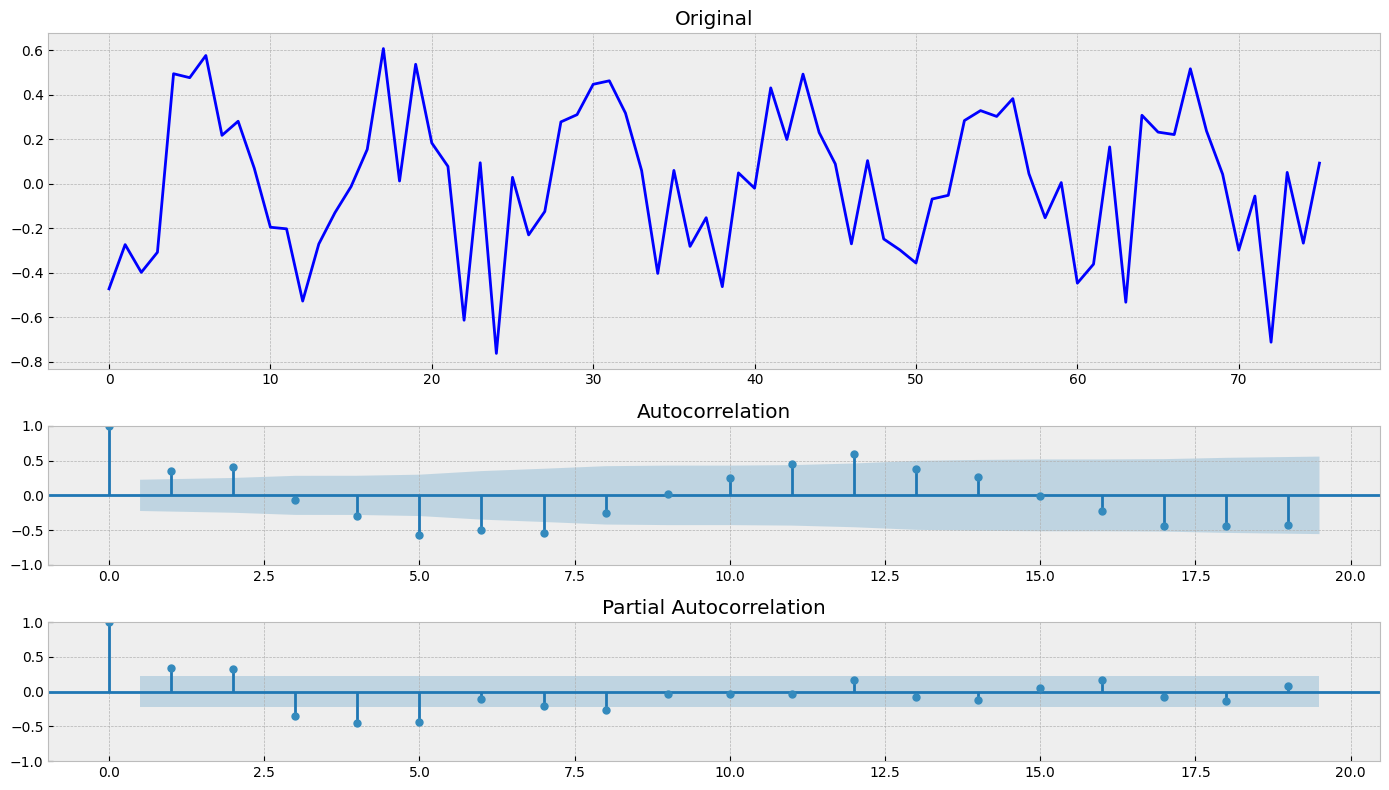

In [157]:
tsplot(series_5)

In [158]:
series_5 = series_5[12:] - series_5[:-12]

Results of Dickey-Fuller Test:
Test Statistic                 -2.316045
p-value                         0.166845
#Lags Used                     10.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


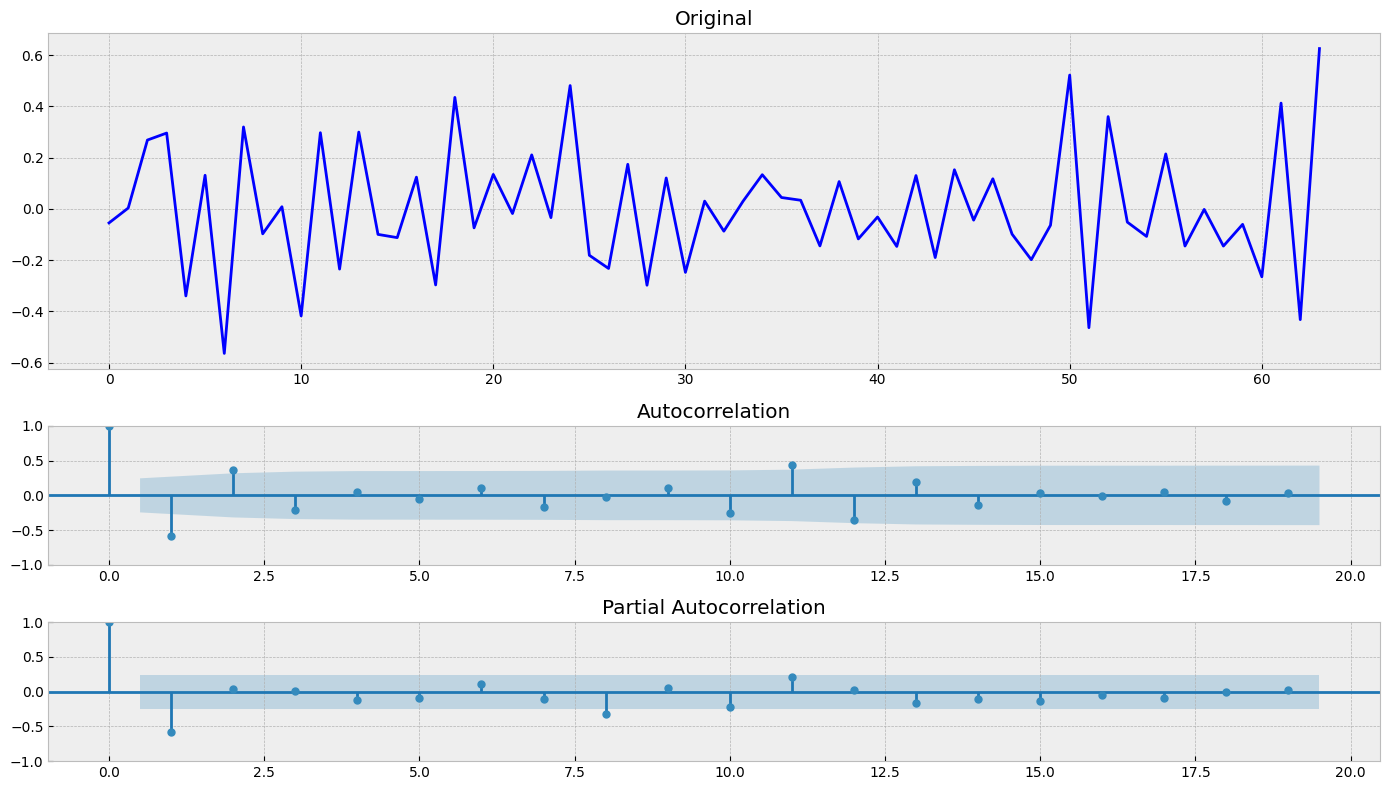

In [159]:
tsplot(series_5)

In [160]:
series_5 = series_5[1:] - series_5[:-1]

Results of Dickey-Fuller Test:
Test Statistic                 -5.290390
p-value                         0.000006
#Lags Used                      9.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


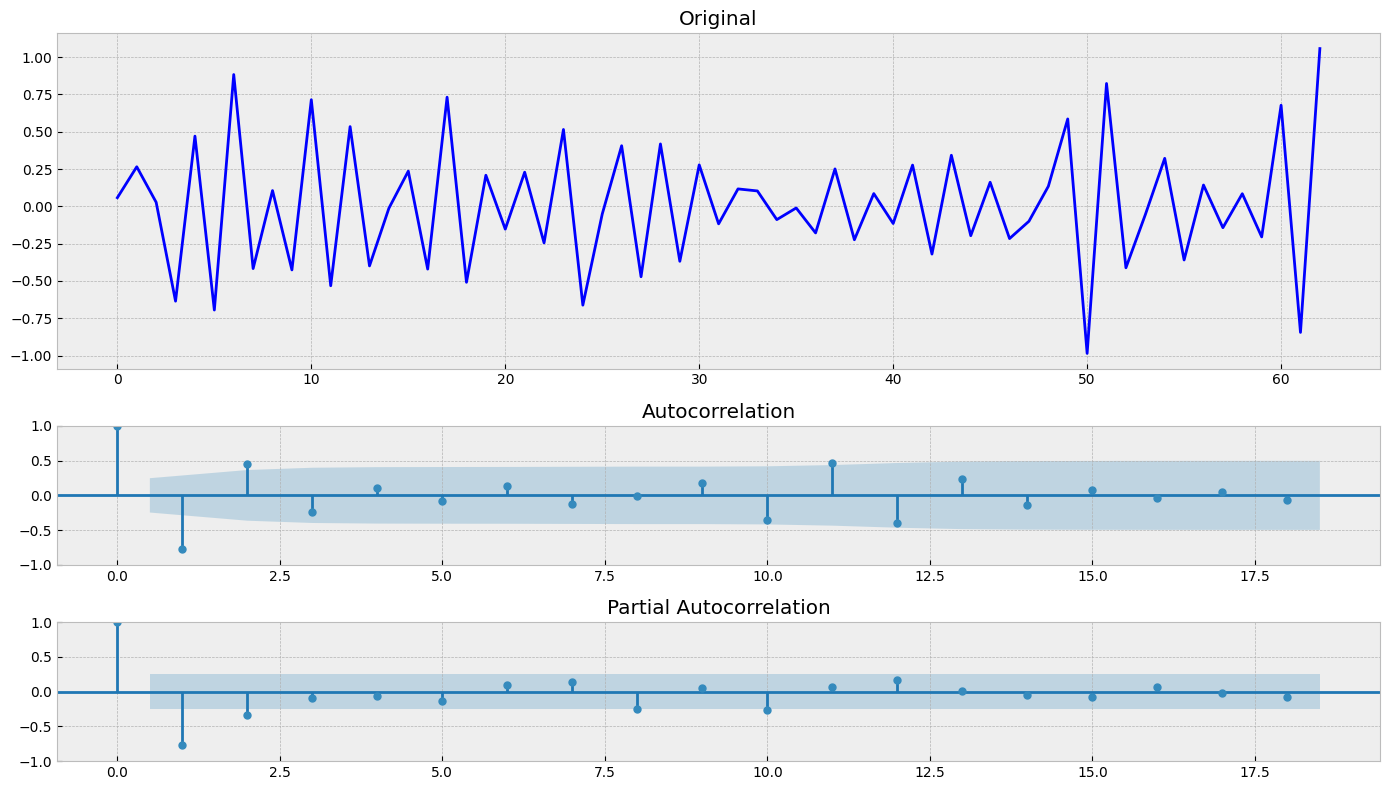

In [161]:
tsplot(series_5)

Test Statistic < Critical Value (1%) (-5.29 < -3.56) => the series is **stationary**

6. weekly-closings-of-the-dowjones-

In [167]:
series_6 = pd.read_csv('/content/weekly-closings-of-the-dowjones-.csv')['Close']
series_6.head()

0    890.19
1    901.80
2    888.51
3    887.78
4    858.43
Name: Close, dtype: float64

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


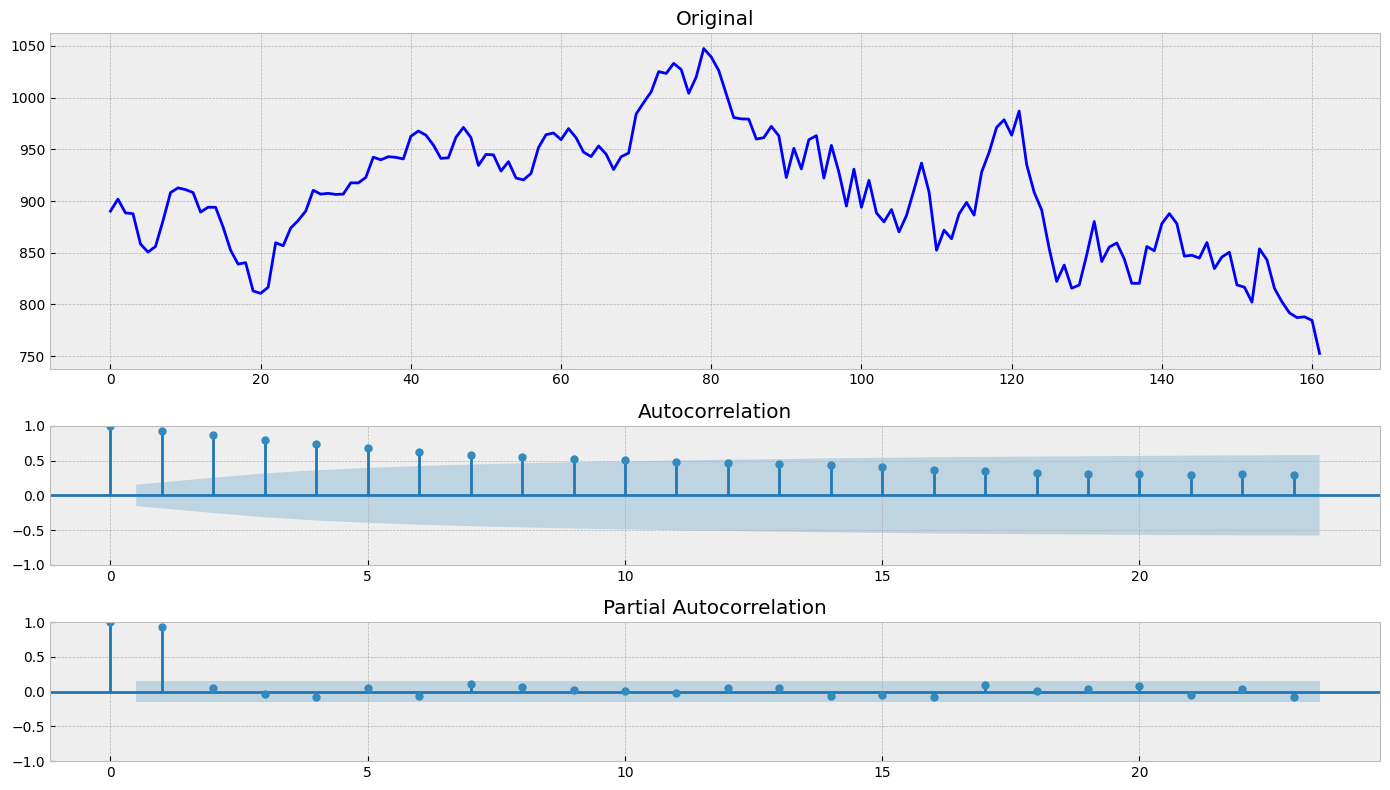

In [168]:
tsplot(series_6)

In [169]:
series_6 = series_6[1:].to_numpy() - series_6[:-1].to_numpy()

Results of Dickey-Fuller Test:
Test Statistic                -1.302521e+01
p-value                        2.407586e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


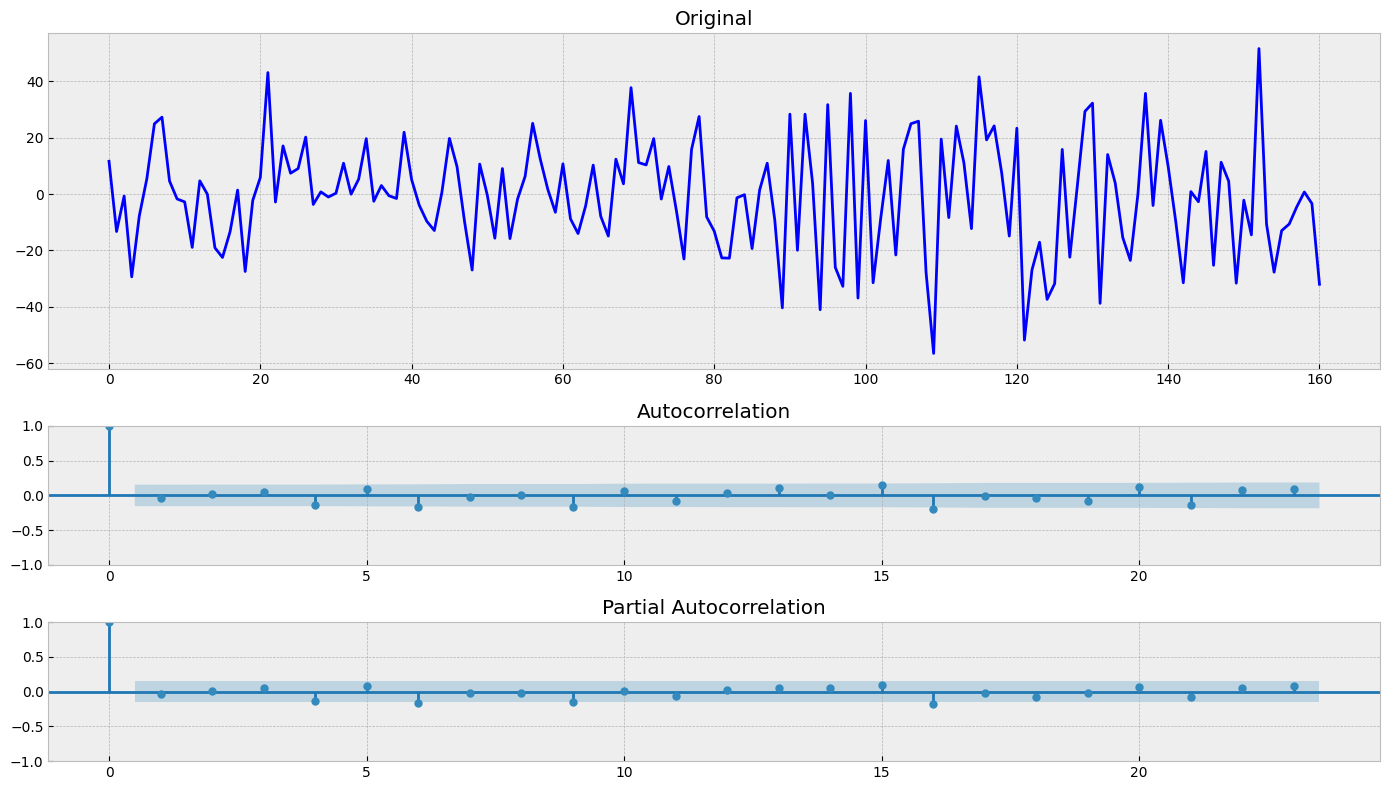

In [170]:
tsplot(series_6)

Test Statistic < Critical Value (1%) (-13.03 < -3.47) => the series is **stationary**